# Benford's Law in online collaboration platforms #

In [4]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from matplotlib import pyplot as plt

In [135]:
#website_url = requests.get("https://en.wikipedia.org/wiki/Wikipedia:List_of_Wikipedians_by_number_of_edits").text
website_url = requests.get("https://en.wikipedia.org/wiki/Wikipedia:List_of_Wikipedians_by_number_of_edits/5001%E2%80%9310000").text

In [136]:
soup = BeautifulSoup(website_url,"lxml")
#print(soup.prettify())

In [137]:
wikitable = soup.findAll("table",{"class":"wikitable"})
table=dict()

###### Data cleaning #####
for i in range (0,6):
    table[i] = [item.get_text() for item in wikitable[i].find_all('tr')]
    table[i] = [item.replace("\n\n", "|") for item in table[i]]
    table[i] = [item.strip("\n") for item in table[i]]
    table[i] = [item.split("|") for item in table[i]]

#######specific to table 0
for x in table[0][0]:
    table[0][0] = x.split("\n")

In [138]:
###Convert to df ####

df=pd.DataFrame(columns=["No.","User", "Edit count", "User groups"])

for i in range(1,6):
    df1 = pd.DataFrame(table[i])
    df1.columns = df1.iloc[0]
    df1 = df1[1:]
    df= df.append(df1, ignore_index=True)

df.shape

(5000, 4)

In [139]:
df.rename(columns={'Edit count': 'Edit_count', 'User groups': 'User_group'}, inplace=True)
df.tail()

,No.,User,Edit_count,User_group
4995,9996,Rray,"8,114",ECo
4996,9997,Jon C.,"8,114","ECo, Ro"
4997,9998,Mountolive,"8,112",ECo
4998,9999,Decathlete,"8,112",
4999,10000,Domino theory,"8,111",


In [8]:
#split Edit_count one and two leading ints
def split(df):
    df.Edit_count = df.Edit_count.str.replace(",", "")
    df["firstnum"] = df["Edit_count"].str[0].apply(int)
    df["secondnum"] = df["Edit_count"].str[0:2].apply(int)
    wiki_benford = list(df_orig.firstnum.value_counts(normalize=True).sort_index())

######turn this off when appending the list of 5001-10,000 #########
#df_orig = df

######turn this on when appending the list of 5001-10,000 #########
#df_orig = df_orig.append(df)


In [7]:
def splitgh(df):
    df["total"] = df["total"].astype(str)
    df["firstnum"] = df["total"].str[0].apply(int)
    df["secondnum"] = df["total"].str[0:2].apply(int)
    gh_benford = list(df.firstnum.value_counts(normalize=True).sort_index())

In [143]:
print(df_orig.shape) #this should be (10000,6)
df_orig

(10000, 6)


,No.,User,Edit_count,User_group,firstnum,secondnum
0,1,Ser Amantio di Nicolao,2713112,Ad,2,27
1,2,Koavf,1983421,"AP, ECo, EM, F, IP, N, Rv, Ro, TE",1,19
2,3,Rich Farmbrough,1450131,"EFM, AP, ECo, F, Rv, Ro, TE",1,14
3,4,BD2412,1250040,Ad,1,12
4,5,Waacstats,1203047,"AP, Rv",1,12
5,6,Tom.Reding,1078933,"ECo, EM, TE",1,10
6,7,Materialscientist,1026174,"EFM, Ch, Ad",1,10
7,8,Hmains,1011869,"AP, ECo, Rv",1,10
8,9,Bearcat,1003163,Ad,1,10
9,10,Tim!,917014,Ad,9,91


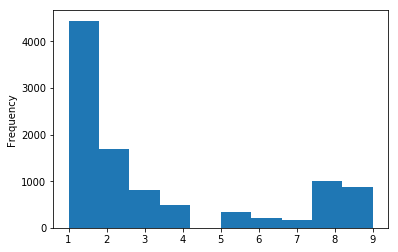

In [144]:
df_orig.firstnum.plot(kind="hist")
#Already suspect...

In [13]:
benford = [0.301, 0.1761, 0.1249, 0.0969, 0.0792, 0.0669, 0.058, 0.0512,0.0458]

In [26]:
wiki_benford = list(wikidf.firstnum.value_counts(normalize=True).sort_index())
chart = pd.DataFrame(list(zip(wiki_benford,benford)), columns = ["Wikipedia","Benford's law"])
chart.index = chart.index+1 #for the chart
chart

,Wikipedia,Benford's law
1,0.4446,0.3010
2,0.1682,0.1761
3,0.0803,0.1249
4,0.0487,0.0969
5,0.0331,0.0792
6,0.0215,0.0669
7,0.0159,0.0580
8,0.1007,0.0512
9,0.0870,0.0458


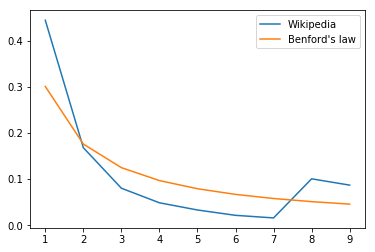

In [27]:
import seaborn as sns
plt.plot(chart)
plt.legend(chart.columns)

## There is a suspicious spike in the 8 and 9 digit! 😱##

### Which users are these?

In [158]:
df_orig.to_csv("Final project Python.csv", sep='\t') #Just for my reference

In [33]:
df89 = wikidf[wikidf["firstnum"]>=8]
df89.to_csv("89.csv")

In [31]:
print(df89.shape)
df89

(1877, 7)


,Unnamed: 0,No.,User,Edit_count,User_group,firstnum,secondnum
9,9,10,Tim!,917014,Ad,9,91
10,10,11,Magioladitis,902153,"ECo, Ro",9,90
11,11,12,Rjwilmsi,891905,"ECo, Rv, Ro",8,89
12,12,13,BrownHairedGirl,869478,Ad,8,86
13,13,14,Lugnuts,814231,"AP, ECo, EM, N, Rv",8,81
519,519,520,Philip Trueman,99918,"ECo, Rv, Ro",9,99
520,520,521,Steel1943,99904,NaN,9,99
521,521,522,Dough4872,99871,"AP, ECo, F, Rv, Ro",9,99
522,522,523,DISEman,99803,"AP, ECo, Rv",9,99
523,523,524,Kelly,99696,"ECo, F, Rv, Ro",9,99


# Compare these results with another collaboration platform, GitHub -- or stackoverflow -- or quora

In [167]:
#https://gist.github.com/paulmillr/2657075

In [ ]:
#### DIDNT USE THIS CODE but I'll leave it for future reference ########

# code=[]
# user_group=[]

# user=[]
# edit_count=[]
# edit_group=[]

# wikitable = soup.find("table",{"class":"wikitable"})

# for row in wikitable.findAll("tr"):
#     cells = row.findAll("td")
#     if len(cells)==2:
#         code.append(cells[0].find(text=True))
#         code = [x.strip("\n") for x in code]
#         user_group.append(cells[1].find(text=True))
#     elif len(cells)==4:
#         user.append(cells[1].find(text=True))
#         edit_count.append(cells[2].find(text=True))
#         edit_group.append(cells[3].find(text=True))
        
        
# legend = dict(zip(code,user_group))

In [6]:
import requests
import time
import pandas as pd
from scipy import stats

def UserList():
    global user_list
    for i in range(0,5000):
        time.sleep(0.2)
        user_id=i*30 #because each search result gives you 30.
        r = requests.get('https://api.github.com/users?since=%d' %user_id, auth = ('carlaint', 'John2noel'))
        if r.status_code == 200:
            response_data = r.json()
            for num in range(0,30):
                user_list.append(response_data[num]['login'])

def Contrib():
    global df
    for name in user_list:
        time.sleep(0.1)
        r = requests.get('https://github-contributions-api.now.sh/v1/'+str(name), auth=('carlaint', 'John2noel'))
        contrib_data = r.json()
        df_temp = pd.DataFrame(contrib_data['years'])
        df_temp['login_name']= name
        df = df.append(df_temp, sort=False, ignore_index=True)

user_id=0
user_list=[]
df = pd.DataFrame(columns=['range','total','year','login_name'])
UserList()
Contrib()

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [5]:
%timeit -n1 UserList()  #to access usernames via the official GitHub API
%timeit -n1 Contrib()   #to match contributions data using a user-defined Github Contributions API

722 ms ± 23.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
1min 44s ± 2.65 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [11]:
df.to_csv('Github scrape.csv', sep=',', encoding='utf-8')

In [17]:
a = df.groupby(['login_name'])['total'].agg('sum')

In [19]:
a = pd.DataFrame(a)

In [24]:
a.sort_values('total', ascending=False).head()

,total
login_name,
josh,167103
atmos,76058
mtodd,46992
brosner,41764
Caged,41678


In [25]:
df.shape

(11184, 4)

In [5]:
ghdf = pd.read_csv("Github scrape.csv")

In [9]:
splitgh(ghdf)

In [10]:
ghdf.head()

,Unnamed: 0,range,total,year,login_name,firstnum,secondnum
0,0,"{'start': '2018-01-01', 'end': '2018-12-31'}",535,2018,mojombo,5,53
1,1,"{'start': '2017-01-01', 'end': '2017-12-31'}",497,2017,mojombo,4,49
2,2,"{'start': '2016-01-01', 'end': '2016-12-31'}",251,2016,mojombo,2,25
3,3,"{'start': '2015-01-01', 'end': '2015-12-31'}",508,2015,mojombo,5,50
4,4,"{'start': '2014-01-01', 'end': '2014-12-31'}",155,2014,mojombo,1,15


In [35]:
gh_benford = list(ghdf.firstnum.value_counts(normalize=True).sort_index())
chartgh = pd.DataFrame(list(zip(gh_benford,benford)), columns = ["Github","Benford's law"])
chartgh.index = chartgh.index+1 #for the chart
chartgh

,Github,Benford's law
1,0.209406,0.3010
2,0.278791,0.1761
3,0.138859,0.1249
4,0.090308,0.0969
5,0.069295,0.0792
6,0.056152,0.0669
7,0.047657,0.0580
8,0.043097,0.0512
9,0.034782,0.0458


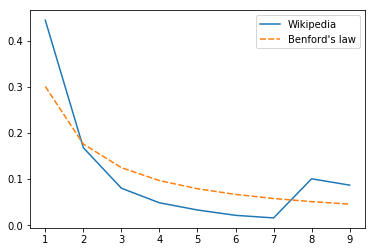

In [56]:
import seaborn as sns
sns.lineplot(data=chart)

In [16]:
print(sns.__version__)

0.9.0


# Generate comparisons

In [26]:
a.describe()

,total
count,898.000000
mean,3949.701559
std,8761.300740
min,1.000000
25%,137.500000
50%,973.000000
75%,4432.250000
max,167103.000000


In [30]:
ghdf.describe()

,Unnamed: 0,total,year
count,11184.00000,11184.000000,11184.000000
mean,5591.50000,317.134478,2012.140111
std,3228.68704,970.184627,5.274640
min,0.00000,0.000000,1969.000000
25%,2795.75000,1.000000,2010.000000
50%,5591.50000,25.000000,2013.000000
75%,8387.25000,229.000000,2016.000000
max,11183.00000,37435.000000,2018.000000


In [23]:
wikidf = pd.read_csv("Final project Python.csv")

In [39]:
wikidf.describe()

,Unnamed: 0,No.,Edit_count,firstnum,secondnum
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,2499.500000,5000.500000,33270.357900,3.211100,36.031300
std,1443.447818,2886.895680,66175.069134,2.860307,29.136575
min,0.000000,1.000000,8111.000000,1.000000,10.000000
25%,1249.750000,2500.750000,11300.000000,1.000000,14.000000
50%,2499.500000,5000.500000,17355.500000,2.000000,22.000000
75%,3749.250000,7500.250000,31882.000000,5.000000,52.000000
max,4999.000000,10000.000000,2713112.000000,9.000000,99.000000


In [38]:
pd.set_option('float_format', '{:f}'.format)

# Demonstrating a violation of Benford's law using a restricted random number generator

In [28]:
import pandas as pd 
import random 

def getDist(maxnum):
    ll = [0]*10 
    for i in range(1000):
        ll[ int(str(random.randint(0,maxnum))[0]) ] += 1
    return ll

dist = pd.Series( getDist(999) ) 
print(dist)

0      0
1    119
2    103
3    118
4    122
5    110
6    111
7    103
8     95
9    119
dtype: int64


# Scipy t-test

In [38]:
from scipy import stats

In [49]:
stats.chisquare(chart['Wikipedia'], f_exp=chart["Benford's law"])

Power_divergenceResult(statistic=0.28188451274026527, pvalue=0.9999853073125216)

In [50]:
stats.chisquare(chartgh['Github'], f_exp=chart["Benford's law"])

Power_divergenceResult(statistic=0.0985065719247823, pvalue=0.9999997642610521)

In [53]:
stats.ks_2samp(chartgh['Github'], chart["Benford's law"])

Ks_2sampResult(statistic=0.2222222222222222, pvalue=0.9574745441329627)

In [54]:
stats.ks_2samp(chart['Wikipedia'], chart["Benford's law"])

Ks_2sampResult(statistic=0.3333333333333333, pvalue=0.6030013612753802)